In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
class WaveManager():
    
    def __init__(self):
        self.N = 256
        self.dif = 128
        self.num = 128
        self.window = np.hanning(self.N)
        
    def spec(self, data):
        image = []
        for i in range(128):
            image.append(wm.wave2spec(data[self.dif*i:self.dif*i + self.N]))
        return image
        
    def wave2spec(self, data):        
        data = np.fft.fft(self.window*data)
        #data = np.array([np.sqrt(c.real ** 2 + c.imag ** 2) for c in data[:self.num]])
        data = np.array([np.sqrt(c.real ** 2 + c.imag ** 2) for c in data])
        data = np.log(data) / 16.
        return data

    def read_wave(self, filename):
        wf = wave.open(filename , "r" )
        buf = wf.readframes(wf.getnframes())
        data = np.frombuffer(buf, dtype="int16") # 16 kHz?
        return data
    
    def overwrap(self, fft, length, side):
        dst = np.zeros(self.dif * (side-1)+length, dtype=float)
        for i, f in enumerate(fft):
            dst[i*dif:i*dif+length] += np.fft.ifft(f).real
        return dst
    
    def FGLA(self, data, side):
        X = data[:]
        alpha = 1.0
        for i in range(len(data)):
            s = np.random.randn(data[i].shape[0]) * 3.141592
            X.append(data[i] * np.sin(s) * 1.j + data[i] * np.cos(s))
        for _ in range(100):
            L = X
            x = self.overwrap(X, length, side)
            X = np.array([np.fft.fft(x[self.dif*i:self.dif*i + self.N]*self.window) for i in range(self.dif)])
            X = fft * X / np.abs(X)
            X = X + alpha*(X - L)
        return overwrap(X, length, dif, side)
    
    def save_image(self, image, file_name):
        image = np.array(image) * 255
        cv2.imwrite(file_name, image)

In [9]:
wm = WaveManager()
data = wm.read_wave("VoiceData/02-80.wav.wav")
image = wm.spec(data)

ValueError: output array is read-only

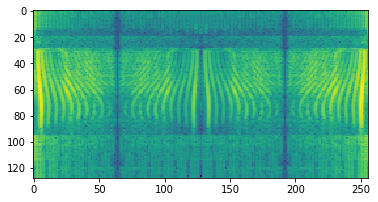

In [4]:
plt.imshow(image)

In [5]:
wm.save_image(image, "test.png")

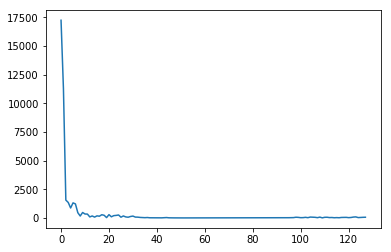

In [6]:
data = wm.read_wave("VoiceData/02-80.wav.wav")
n = 40000
data = np.fft.fft(np.hanning(256)*data[n:n+256])
data = np.array([np.sqrt(c.real ** 2 + c.imag ** 2) for c in data[:128]])
plt.plot(data)

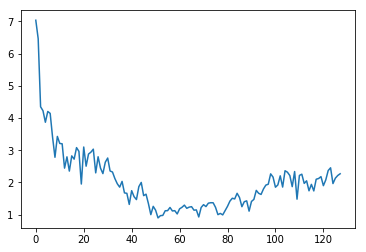

In [7]:
data_ = data**0.2
plt.plot(data_)

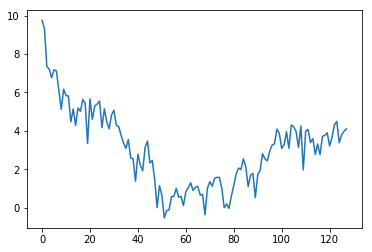

In [8]:
data_ = np.log(data)
plt.plot(data_)

In [ ]:
fs = 16000.0
dt = 1.0 / fs
size = 256

t = np.linspace(1, N, N)*dt-dt
y = np.sin(2*np.pi*f*t)